In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix,RocCurveDisplay

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

# Train Test Seperation

In [8]:
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=40, train_size=.70)

In [9]:
x_train.shape, y_train.shape

((209, 12), (209,))

In [10]:
x_test.shape, y_test.shape

((90, 12), (90,))

# Implementing Model

In [11]:
#from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(x_train,y_train)
reg

LogisticRegression()

In [12]:
reg.coef_

array([[ 8.37409715e-03,  9.98465119e-05,  1.83416575e-04,
         2.71434313e-05, -1.96693737e-03,  3.69272246e-05,
        -1.71646909e-06,  6.16539489e-04,  1.00439505e-02,
         1.21218900e-05, -1.45489858e-05, -2.06895513e-02]])

In [13]:
reg.intercept_

array([8.17710123e-05])

In [14]:
reg.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [15]:
np.array(y_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

# Evaluate Model

In [16]:
#from sklearn.metrics import classification_report, accuracy_score, precision_score
#from sklearn.metrics import recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [17]:
train_accuracy = reg.score(x_train,y_train)
test_accuracy = reg.score(x_test, y_test)
accuracy_score = accuracy_score(y_test, reg.predict(x_test))
precision_score = precision_score(y_test, reg.predict(x_test))
recall_score = recall_score(y_test, reg.predict(x_test))
f1_score = f1_score(y_test, reg.predict(x_test))
cm = confusion_matrix(y_test, reg.predict(x_test))

print(colored('Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm}',color='light_yellow'))

Model Evaluation:

train_accuracy : 0.83
test_accuracy : 0.83
accuracy_score : 0.83
precision_score : 0.81
recall_score : 0.68
f1_score : 0.74

confusion_matrix :
 [[54  5]
 [10 21]]


Heatmap of confusion_matrix

<Axes: >

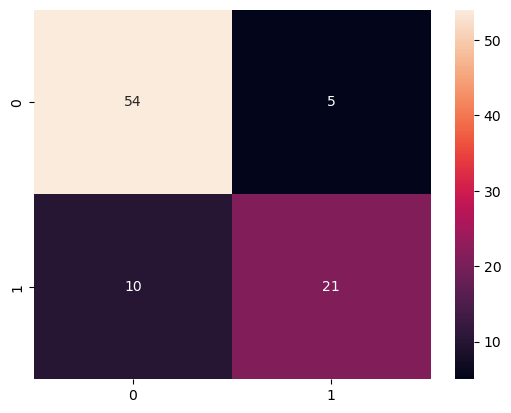

In [18]:
sns.heatmap(cm, annot=True)

Classification_report

In [19]:
report = classification_report(y_test, reg.predict(x_test))
print(colored('Classification_report:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'{report}',color = 'light_magenta'))

Classification_report:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        59
           1       0.81      0.68      0.74        31

    accuracy                           0.83        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.83      0.83      0.83        90



RocCurve visualization

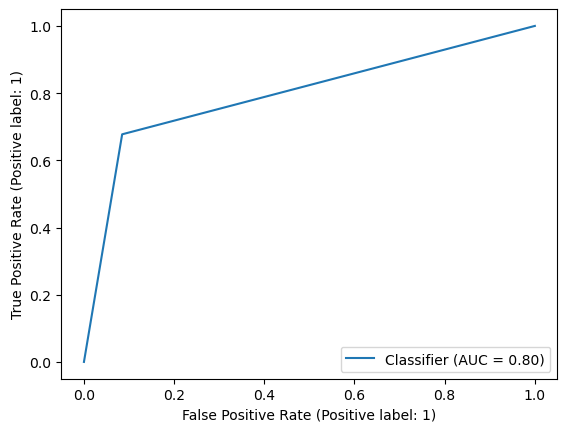

In [20]:
RocCurveDisplay.from_predictions(y_test, reg.predict(x_test))
#plt.plot([0,1],[0,1])
plt.show()

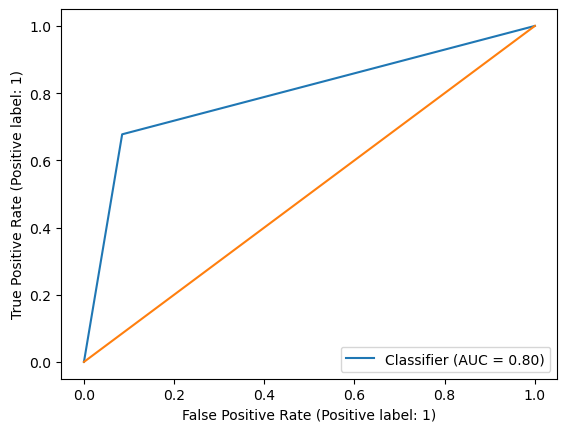

In [21]:
RocCurveDisplay.from_predictions(y_test, reg.predict(x_test))
plt.plot([0,1],[0,1])
plt.show()